In [1]:
library(quantmod)
library(xts)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
getSymbols("IBM")

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "IBM"

In [3]:
dim(IBM)

[1] 2847    6

In [4]:
training_size = floor(dim(IBM)[1]*.75)
testing_size = dim(IBM)[1] - training_size

In [5]:
IBM1 <- IBM[1:training_size,]
head(IBM1)
dim(IBM1)

           IBM.Open IBM.High IBM.Low IBM.Close IBM.Volume IBM.Adjusted
2007-01-03    97.18    98.40   96.26     97.27    9196800     72.61198
2007-01-04    97.25    98.79   96.88     98.31   10524500     73.38837
2007-01-05    97.60    97.95   96.91     97.42    7221300     72.72398
2007-01-08    98.50    99.50   98.35     98.90   10340000     73.82880
2007-01-09    99.08   100.33   99.07    100.07   11108200     74.70219
2007-01-10    98.50    99.05   97.93     98.89    8744800     73.82136

[1] 2135    6

In [6]:
IBM1.close <- IBM1$IBM.Close
head(IBM1.close)

           IBM.Close
2007-01-03     97.27
2007-01-04     98.31
2007-01-05     97.42
2007-01-08     98.90
2007-01-09    100.07
2007-01-10     98.89

In [7]:
IBM1.close$idx <- seq(1,training_size)
IBM1.close[c(1:3, nrow(IBM1.close)),]
tail(IBM1.close)

           IBM.Close  idx
2007-01-03     97.27    1
2007-01-04     98.31    2
2007-01-05     97.42    3
2015-06-25    166.08 2135

           IBM.Close  idx
2015-06-18    168.25 2130
2015-06-19    166.99 2131
2015-06-22    167.73 2132
2015-06-23    168.62 2133
2015-06-24    166.97 2134
2015-06-25    166.08 2135

In [8]:
IBM1 <- data.frame(IBM1)
head(IBM1)

,IBM.Open,IBM.High,IBM.Low,IBM.Close,IBM.Volume,IBM.Adjusted
2007-01-03,97.18,98.40,96.26,97.27,9196800,72.61198
2007-01-04,97.25,98.79,96.88,98.31,10524500,73.38837
2007-01-05,97.60,97.95,96.91,97.42,7221300,72.72398
2007-01-08,98.50,99.50,98.35,98.90,10340000,73.82880
2007-01-09,99.08,100.33,99.07,100.07,11108200,74.70219
2007-01-10,98.50,99.05,97.93,98.89,8744800,73.82136


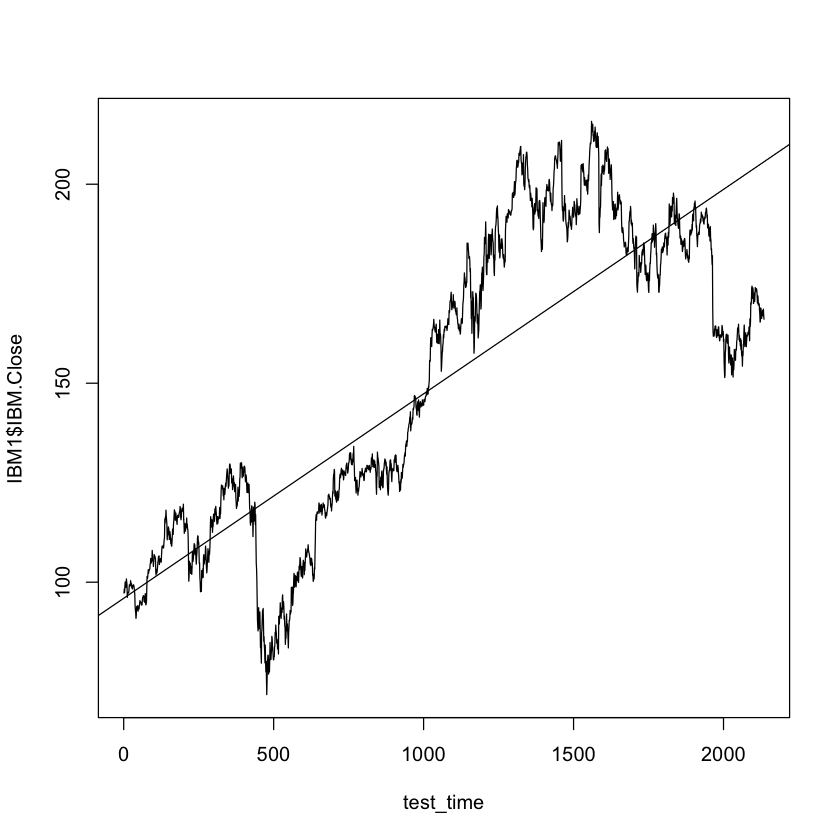

In [9]:
test_time = 1:nrow(IBM1)
linear <- lm(IBM1$IBM.Close~test_time)
plot(x = test_time, y = IBM1$IBM.Close, type = "l")
abline(linear)

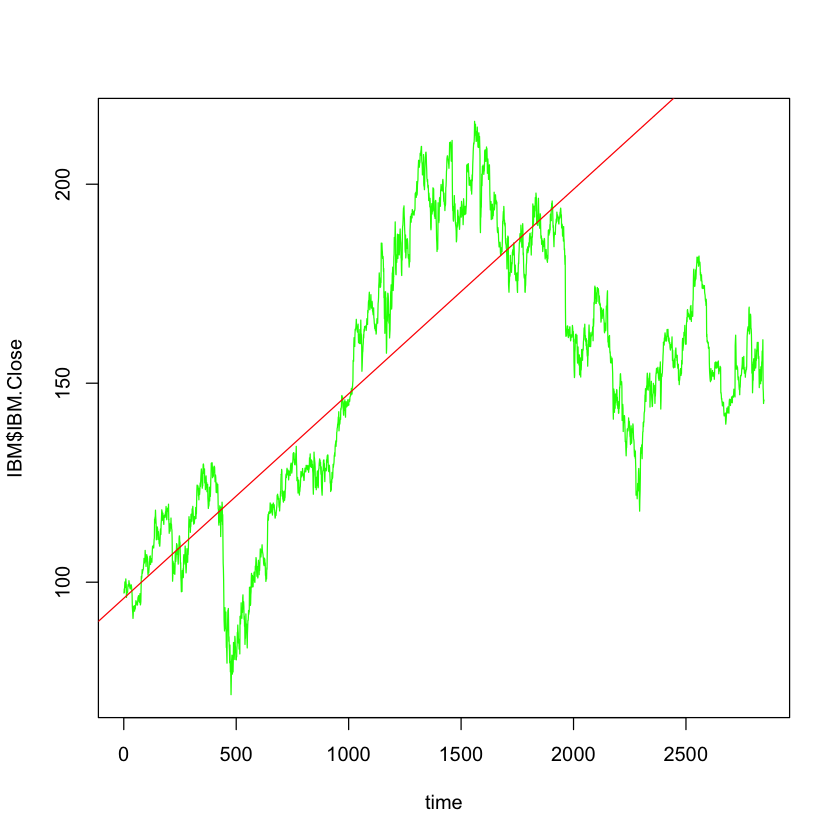

In [10]:
time = 1:nrow(IBM)
plot(x = time, y = IBM$IBM.Close, type = 'l', col = "green")
abline(linear, col = "red")

In [77]:
?nls

In [31]:
typeof(IBM1$IBM.Close)
typeof(test_time)

[1] "double"

[1] "integer"

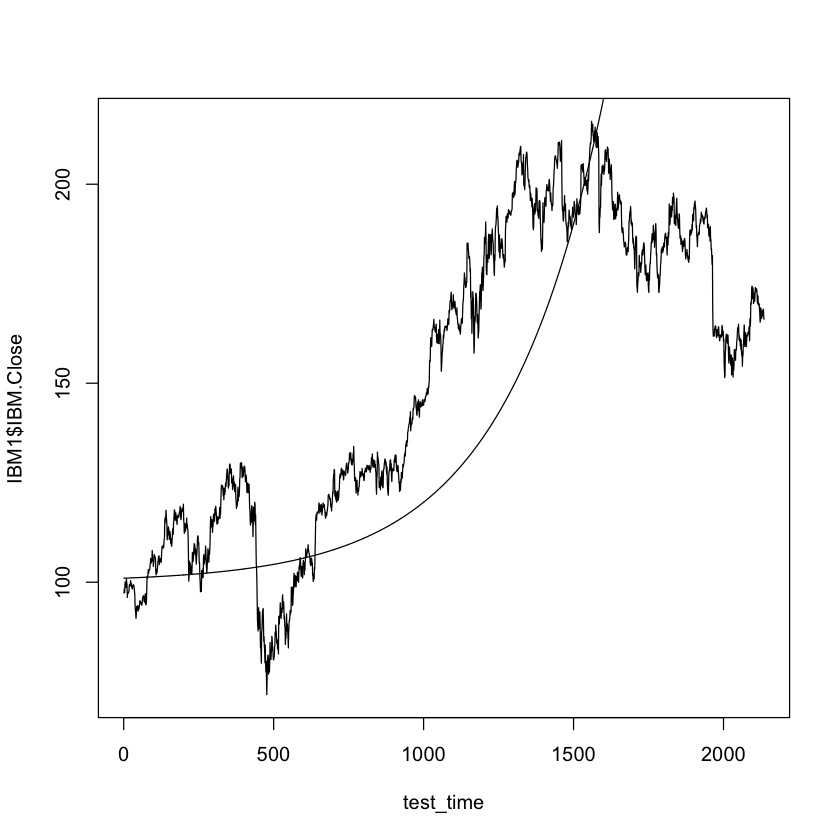

In [75]:
plot(test_time, IBM1$IBM.Close, type = "l")
lines(x=test_time, y=100+exp(.003*test_time))

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”

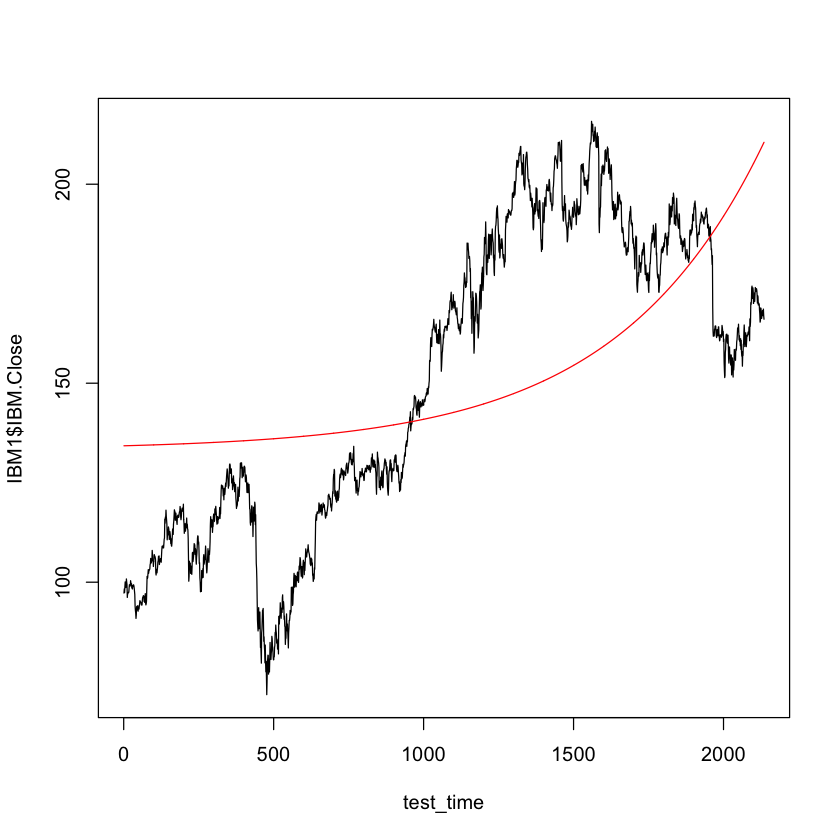

In [83]:
nlmod = nls(formula = IBM1$IBM.Close~Const+exp(A*test_time), start = list(Const = 80, A = .001), data = IBM1)
plot(x = test_time, y = IBM1$IBM.Close, type = "line")
lines(x = test_time, y = predict(nlmod), col = "red")

In [93]:
summary(nlmod)


Formula: IBM1$IBM.Close ~ Const + exp(A * test_time)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
Const 1.333e+02  8.295e-01   160.7   <2e-16 ***
A     2.036e-03  1.660e-05   122.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.02 on 2133 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 3.769e-06


ERROR: Error in xy.coords(x, y): argument "x" is missing, with no default


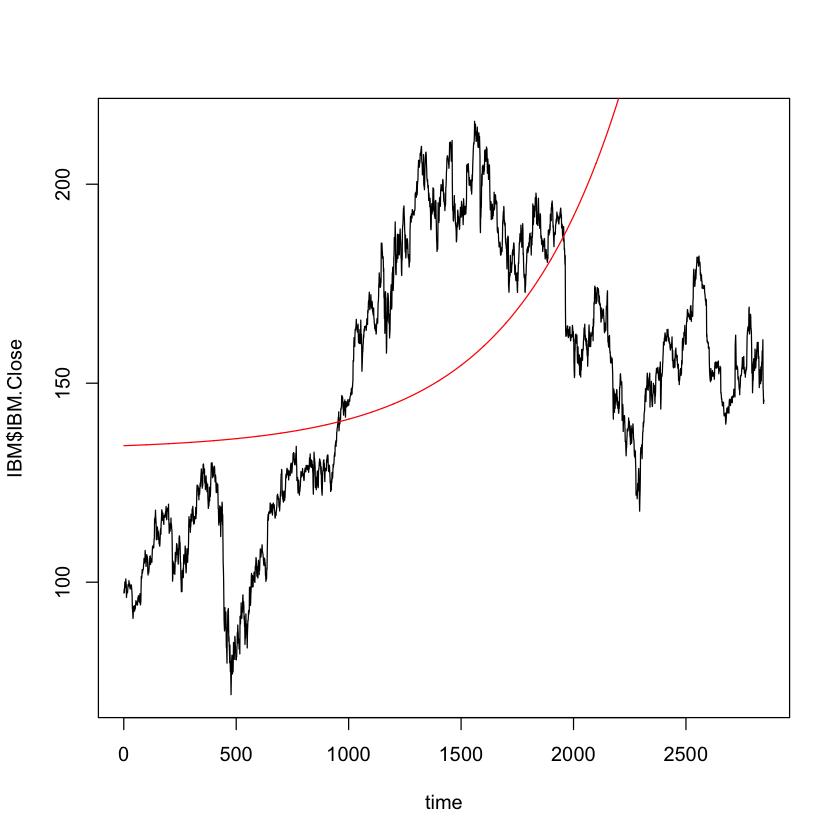

In [102]:
time = 1:nrow(IBM)
plot(x = time, y = IBM$IBM.Close, type = 'l', col = "black")
lines(x = time, y = 133.3+exp(.002036*time), col = "red")
lines( y=predict(nlmod))